In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [6]:
df = pd.read_csv("data/score.csv", sep = ",")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
X, y = df.values[:, 0], df.values[:, 1]
print(X[0])

2.5


In [8]:
linearReg = LinearRegression()
linearReg.fit(X[:, np.newaxis], y[:, np.newaxis])

LinearRegression()

In [9]:
print(f"8.5hour score = {linearReg.predict([[8.5]])}")

8.5hour score = [[85.57800223]]


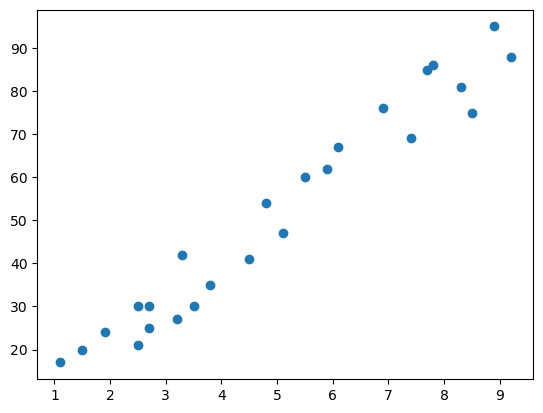

In [10]:
plt.scatter(X, y)

In [11]:
initial_type = [
  ("input_study_hours", FloatTensorType([None, 1]))
]

In [14]:
converted_model = convert_sklearn(linearReg, initial_types = initial_type)
with open("data/sklearn_model_test.onnx", "wb") as f:
  f.write(converted_model.SerializeToString())